In [1]:
import seml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('conv6', to_data_frame=True)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

/nfs/homedirs/ayle/miniconda3/envs/gr/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
result_cols = [col for col in results.columns if col.startswith("result")]

In [4]:
results = results.groupby(['config.arguments.train_scheme', 'config.arguments.prune_criterion', 'config.arguments.pruning_limit',
                          'config.arguments.seed'
                          ])[
    result_cols
].agg('mean')

In [5]:
results

result.train_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.seed                     
DefaultTrainer                EmptyCrit                        0.0                            1234                           0.984375   
                                                                                              2345                           0.953125   
                                                                                              3456                           0.984375   
                                                                                              4567                           0.953125   
                                                                                              5678                           0.984375   
                              StructuredEFGit                  0.5                            1234                           0.890625   

                                                                                                                     result.test_acc  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.seed                    
DefaultTrainer                EmptyCrit                        0.0                            1234                          0.873010   
                                                                                              2345                          0.877488   
                                                                                              3456                          0.867337   
                                                                                              4567                          0.876990   
                                                                                              5678                          0.876791   
                              StructuredEFGit                  0.5                            1234                          0.868332   

                                                                                                                     result.sparsity  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.seed                    
DefaultTrainer                EmptyCrit                        0.0                            1234                          0.000000   
                                                                                              2345                          0.000000   
                                                                                              3456                          0.000000   
                                                                                              4567                          0.000000   
                                                                                              5678                          0.000000   
                              StructuredEFGit                  0.5                            1234                          0.755245   

                                                                                                                     result.success_rate_FGSM_4  \
config.arguments.train_scheme config.arguments.prune_criterion config.arguments.pruning_limit config.arguments.seed                               
DefaultTrainer                EmptyCrit                        0.0                            1234                                     0.624403   
                                                                                              2345                                     0.604797   
                                                                                              3456                                     0.577428   
                                                                                              4567         

In [6]:
results = results.reset_index()

In [10]:
criterions = np.delete(np.unique(results["config.arguments.prune_criterion"]), np.where(np.unique(results["config.arguments.prune_criterion"]) == "EmptyCrit"))

In [12]:
criterions

array(['EarlyJohn', 'GRASP', 'HoyerSquare', 'IMP', 'SNIPit',
       'SNIPitDuring'], dtype=object)

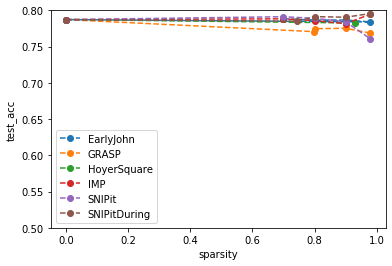

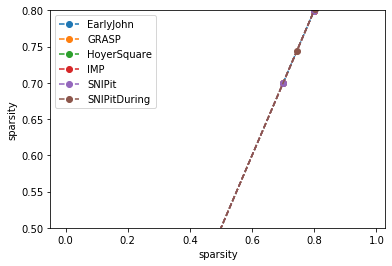

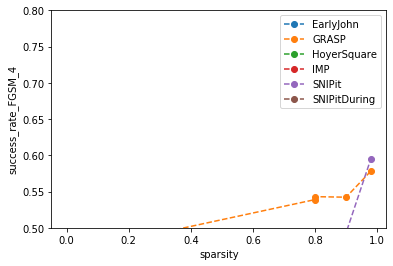

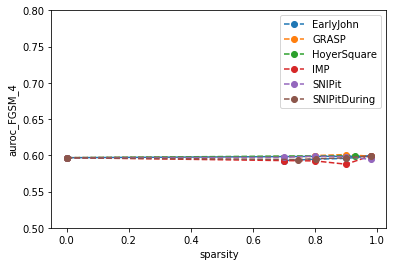

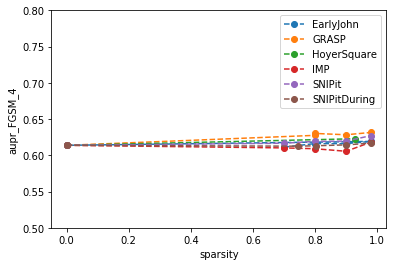

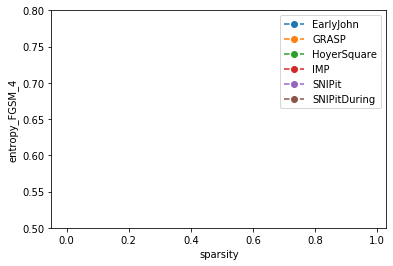

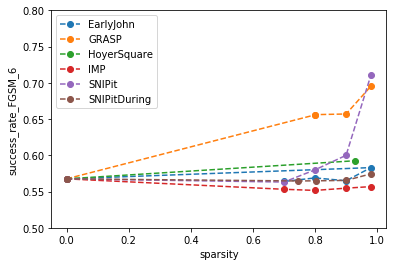

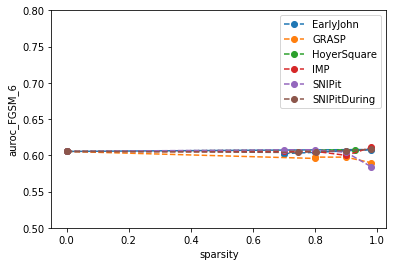

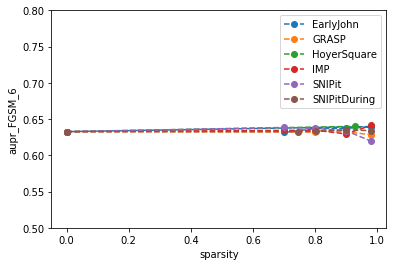

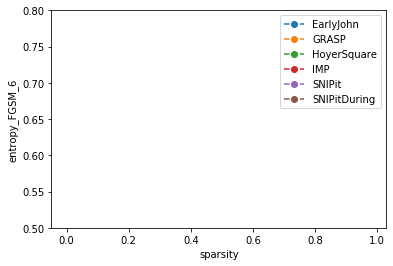

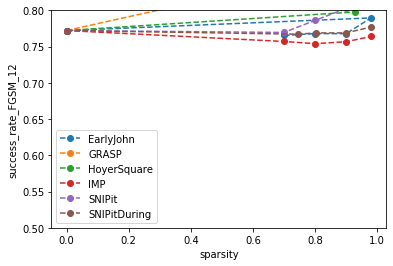

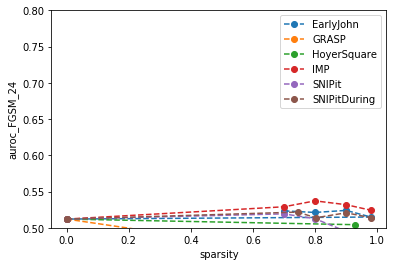

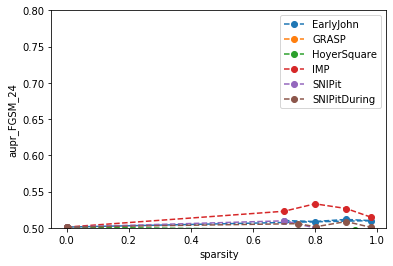

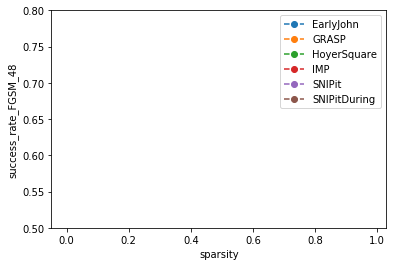

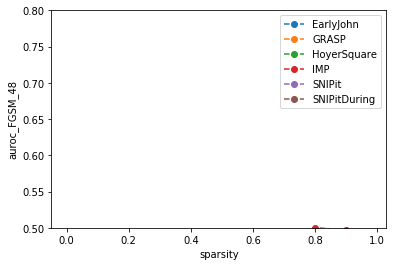

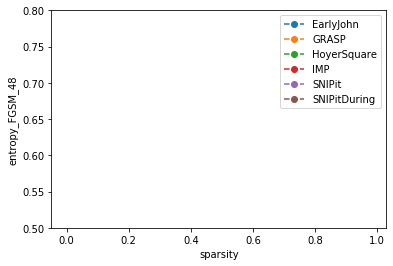

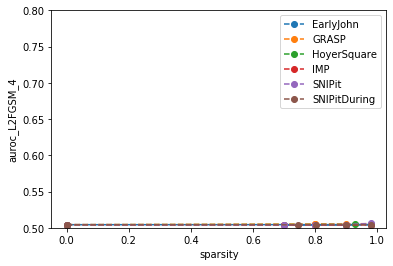

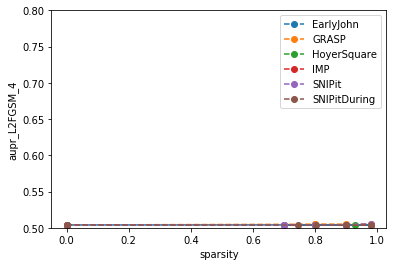

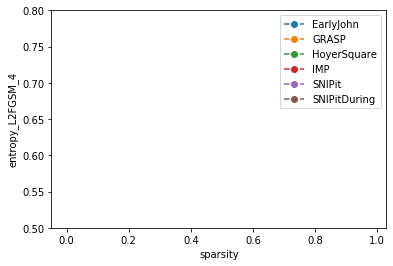

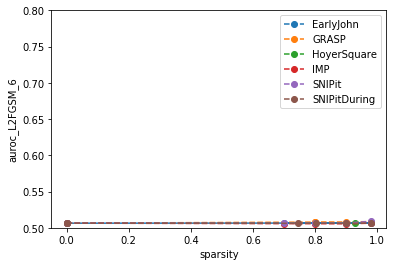

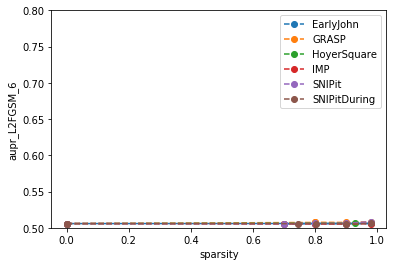

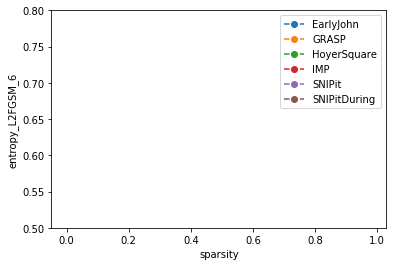

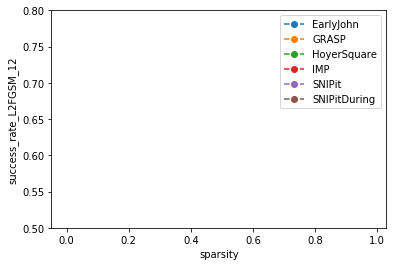

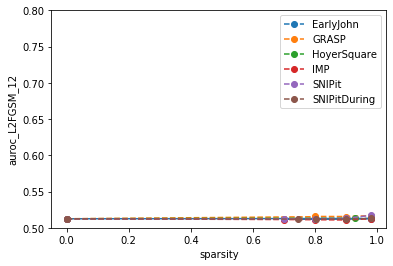

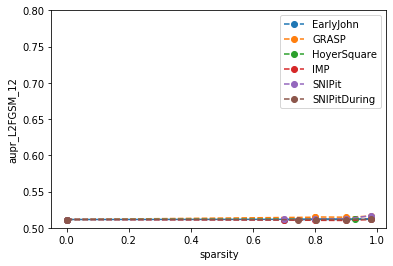

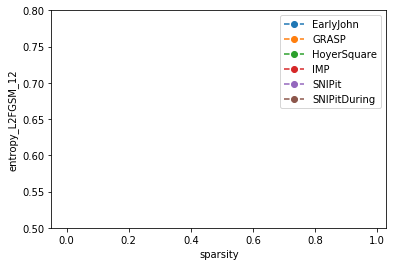

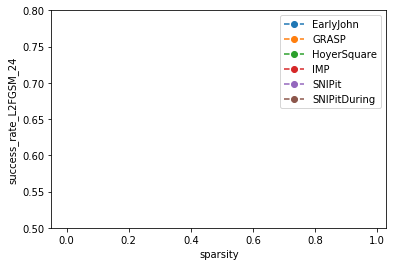

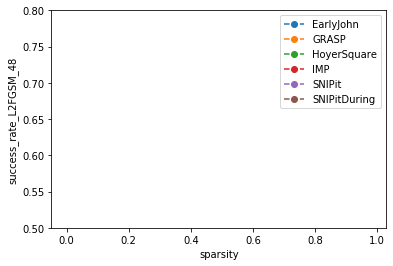

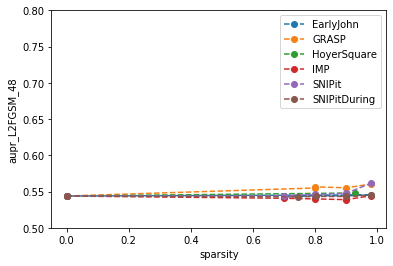

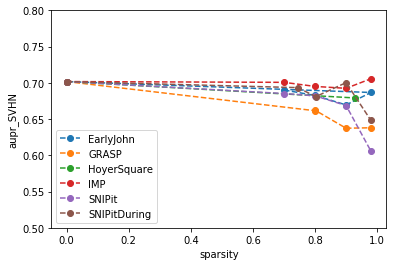

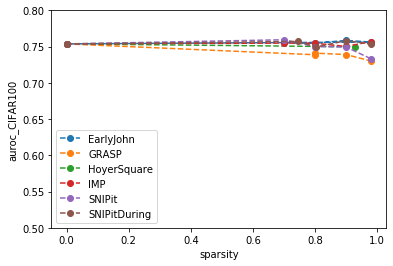

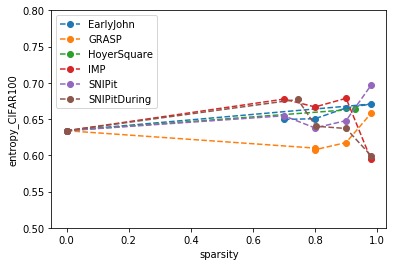

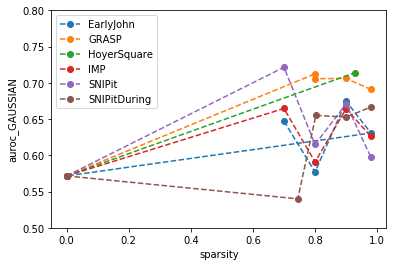

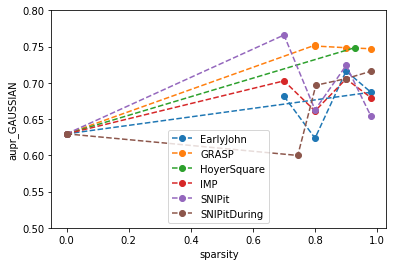

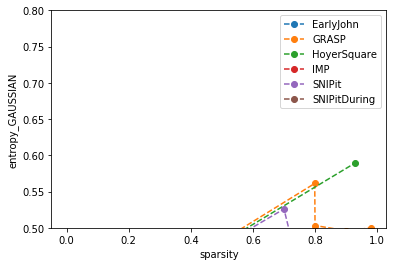

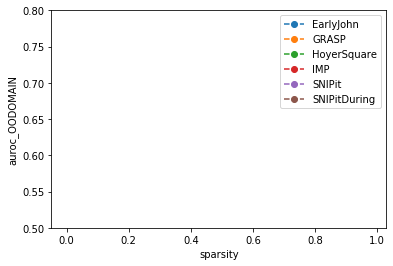

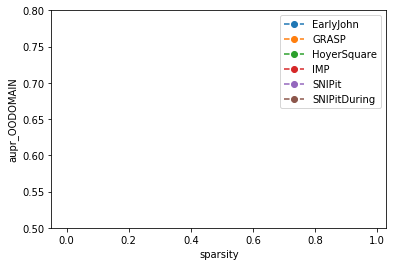

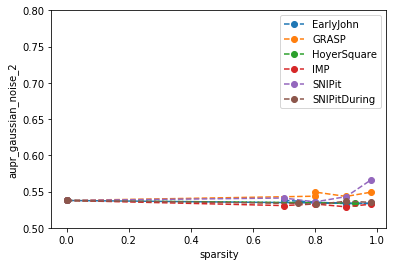

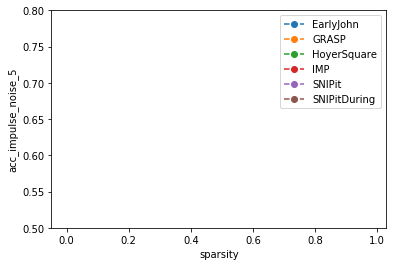

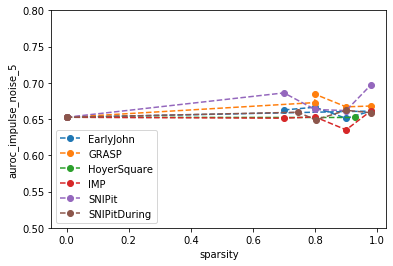

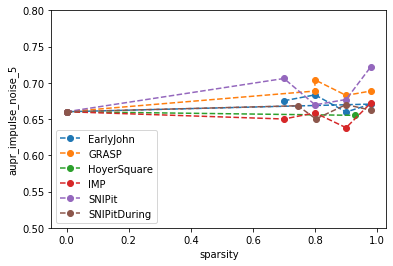

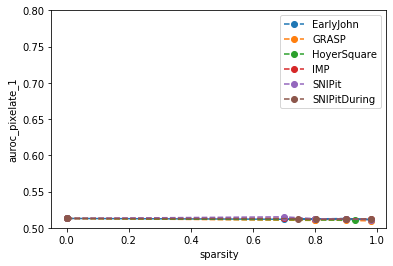

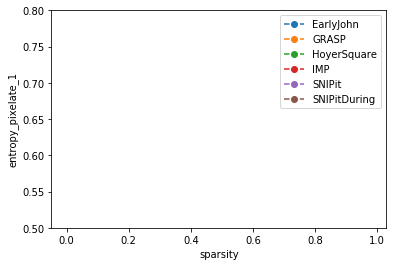

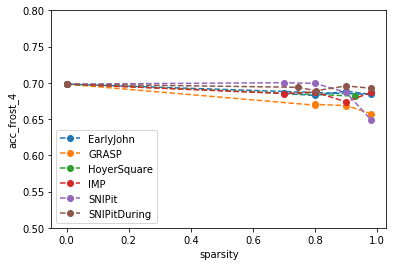

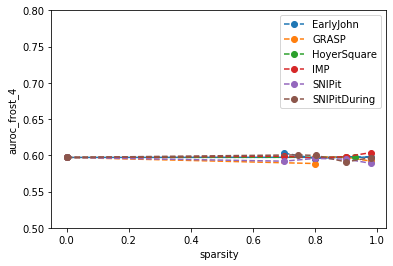

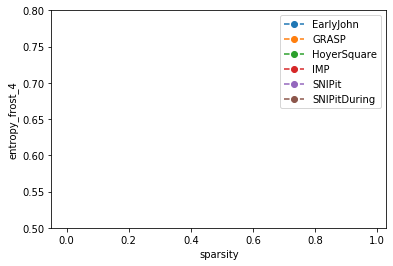

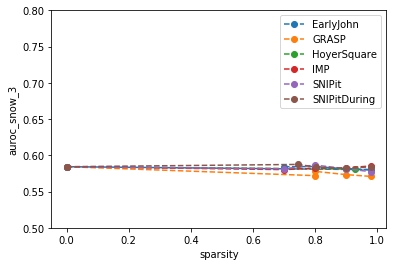

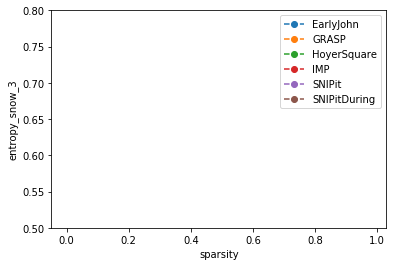

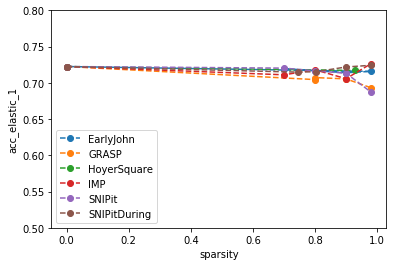

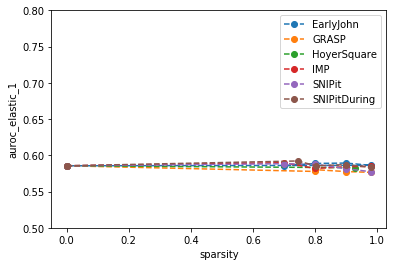

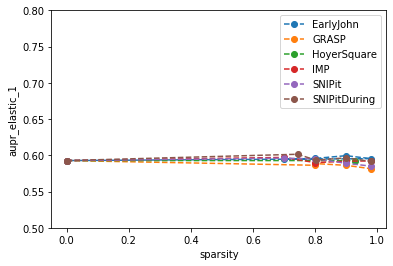

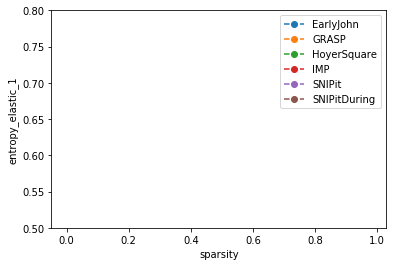

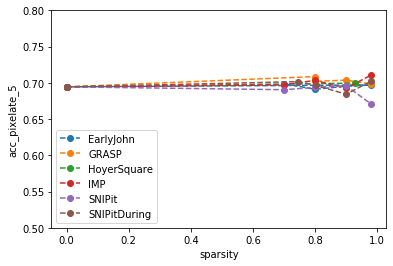

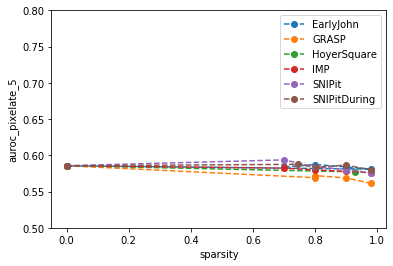

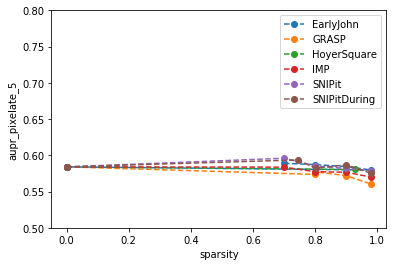

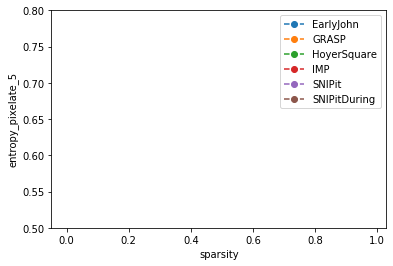

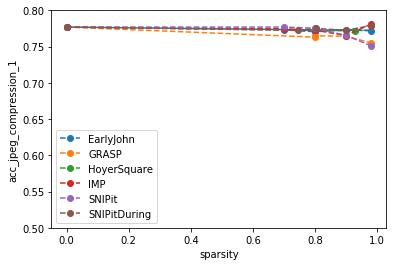

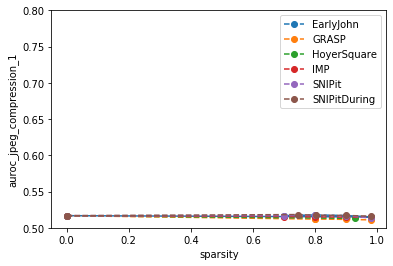

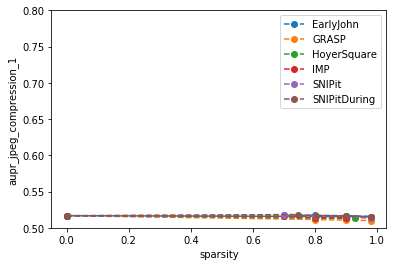

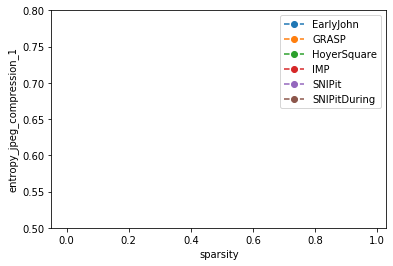

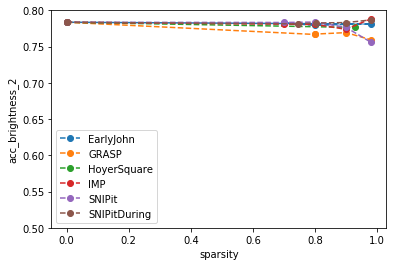

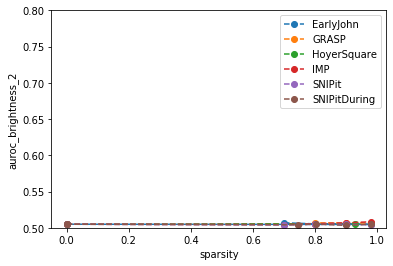

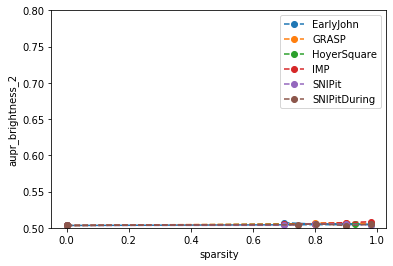

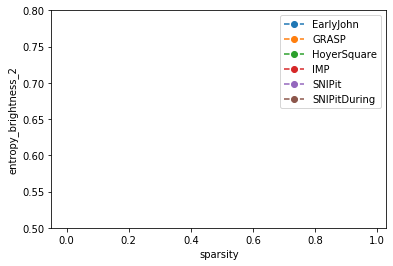

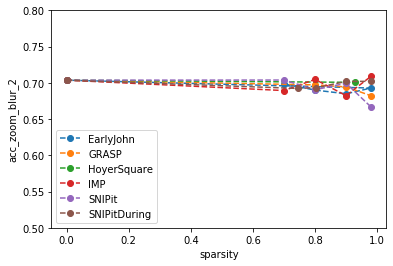

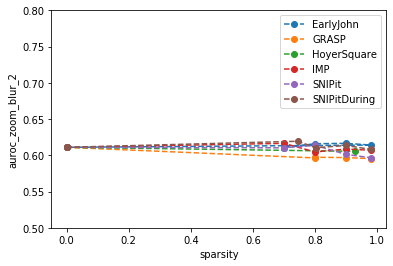

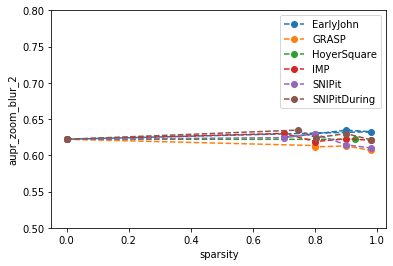

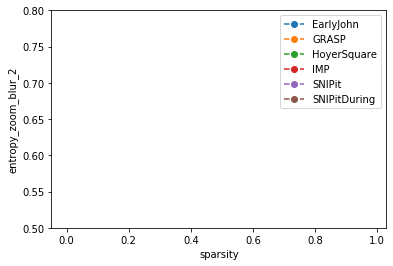

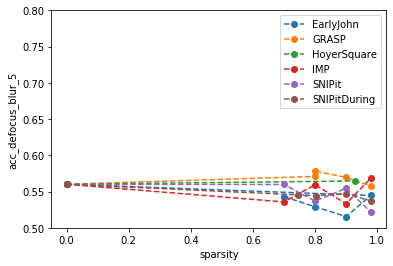

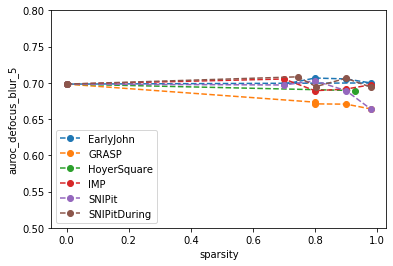

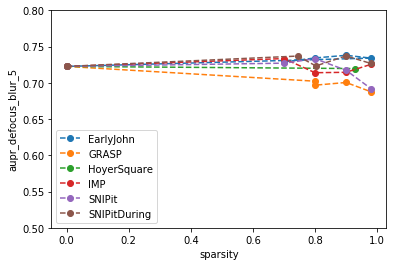

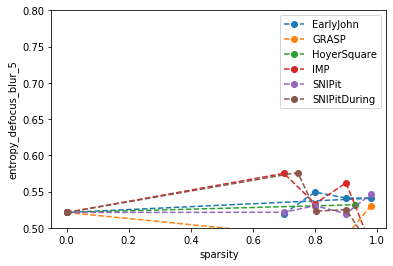

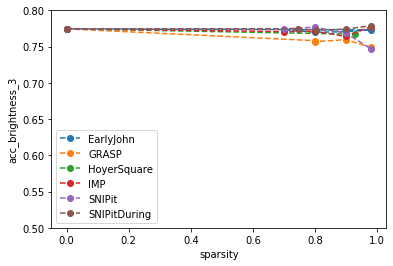

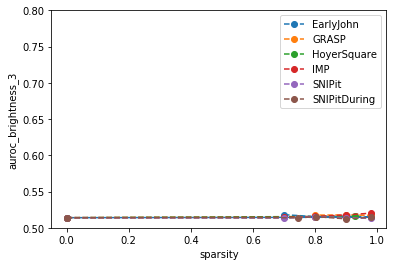

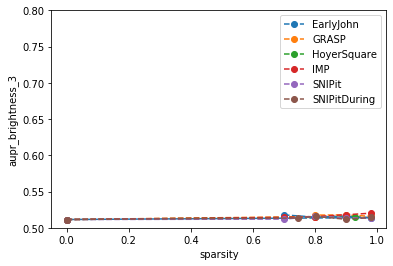

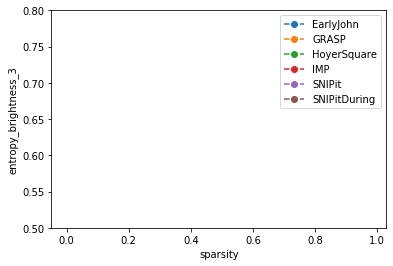

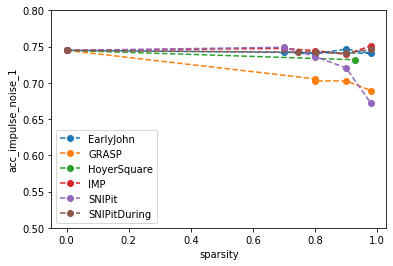

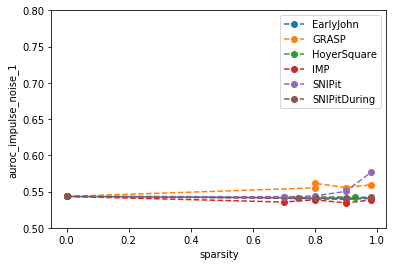

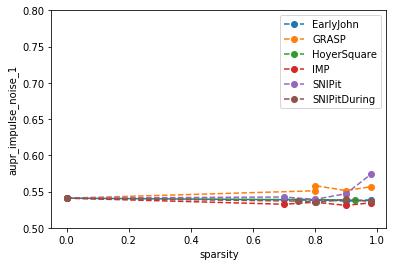

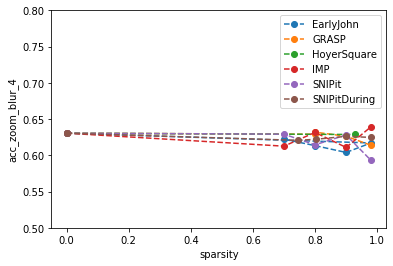

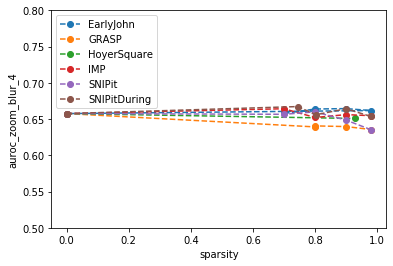

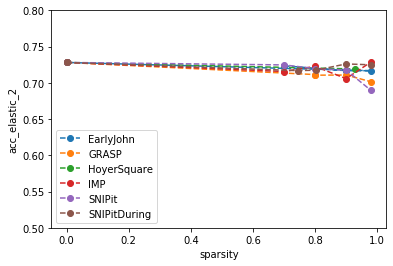

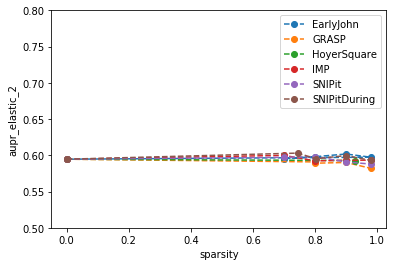

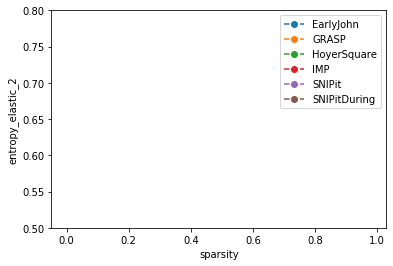

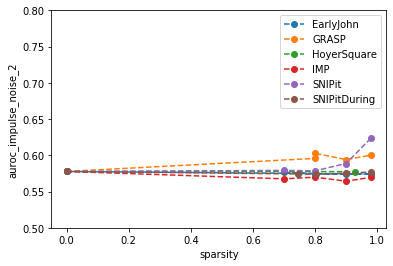

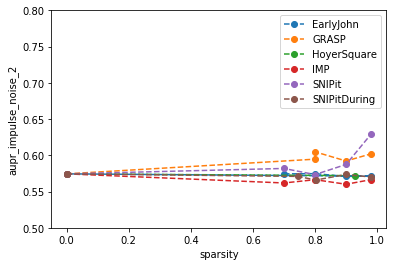

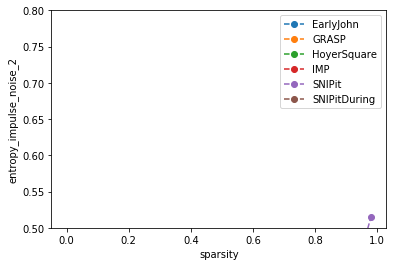

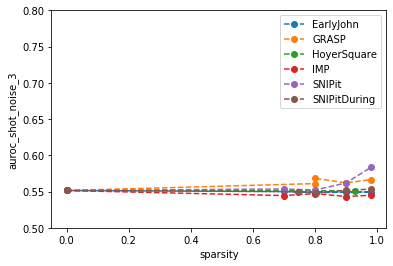

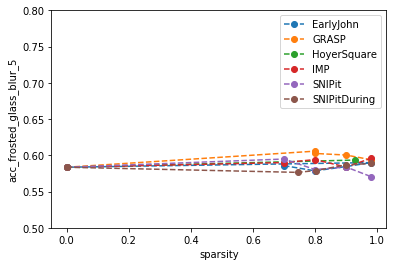

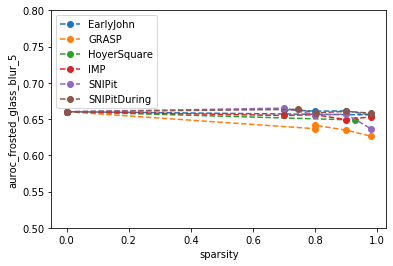

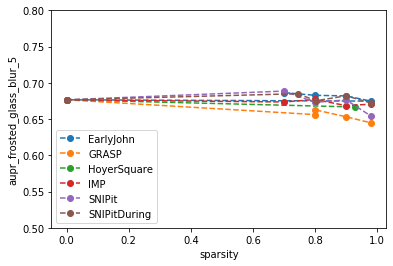

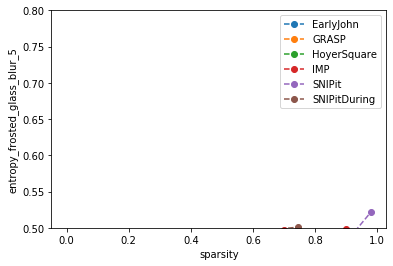

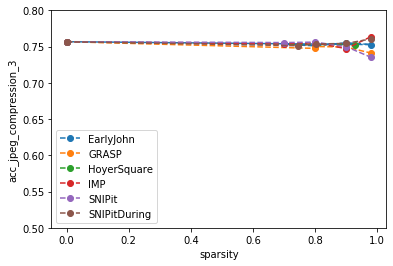

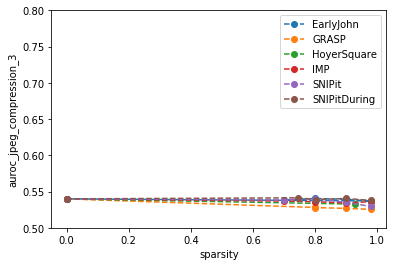

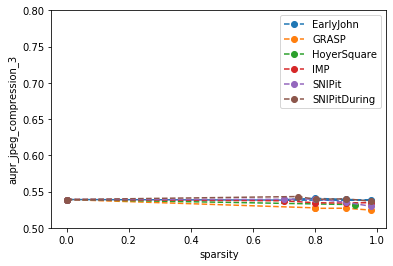

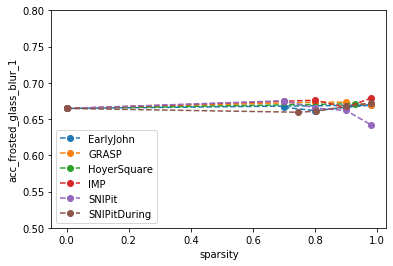

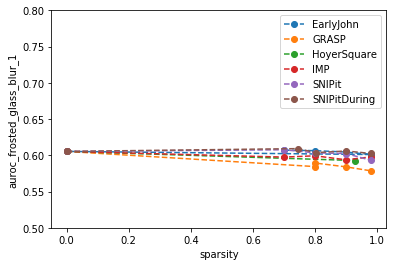

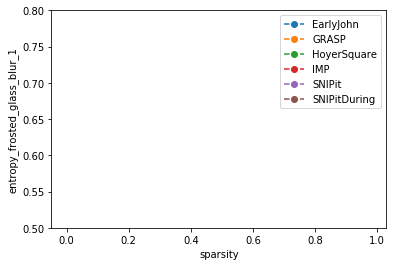

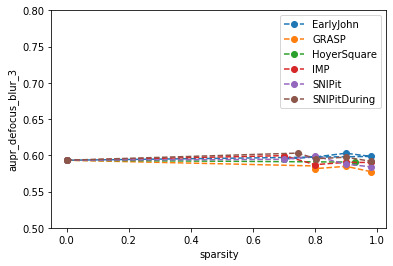

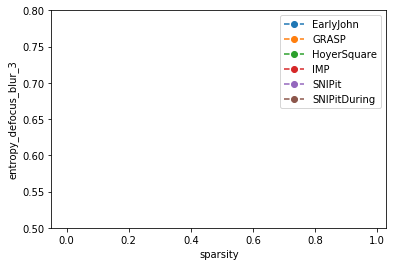

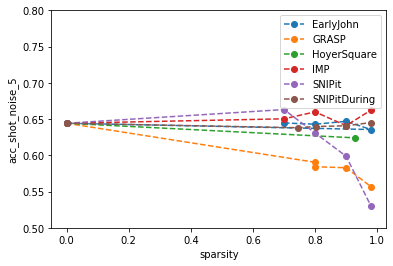

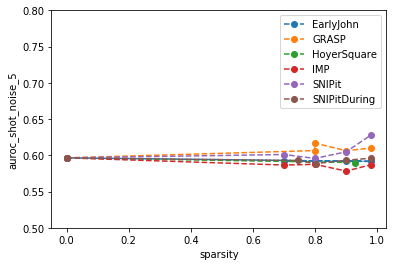

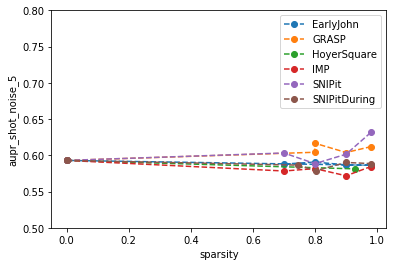

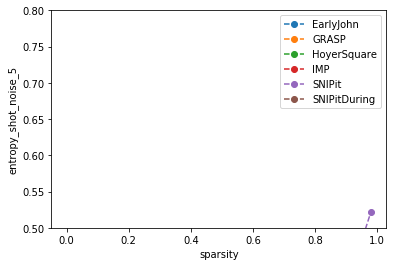

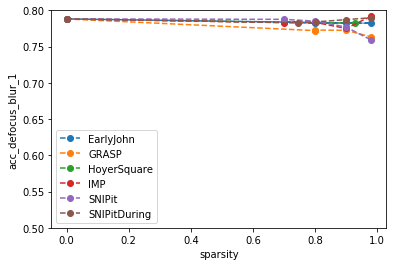

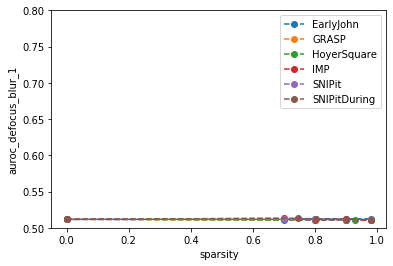

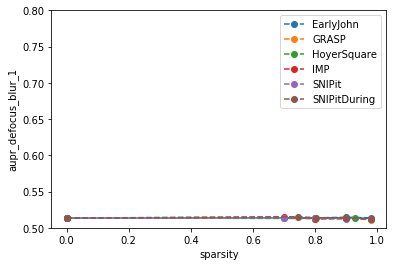

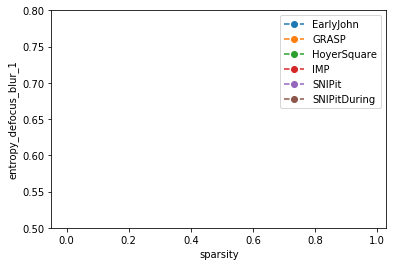

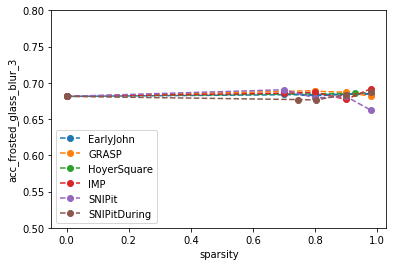

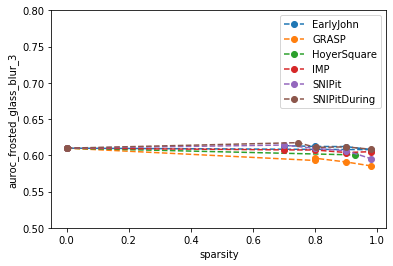

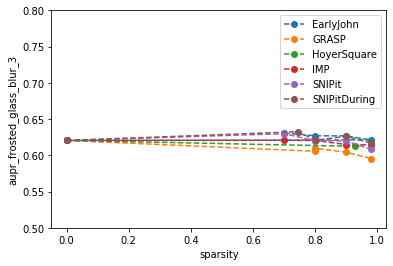

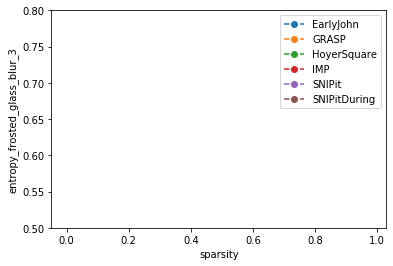

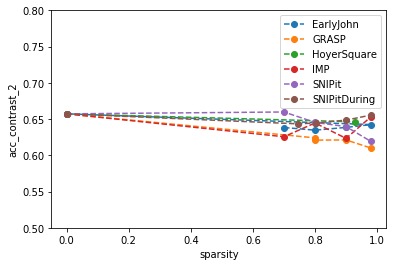

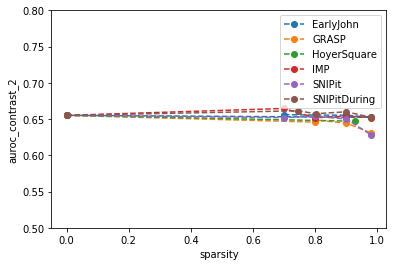

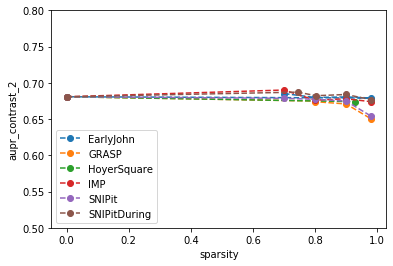

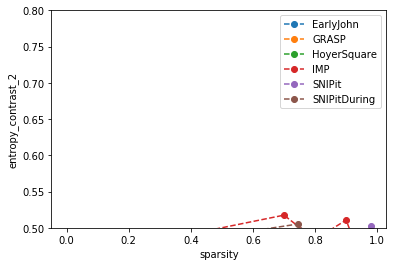

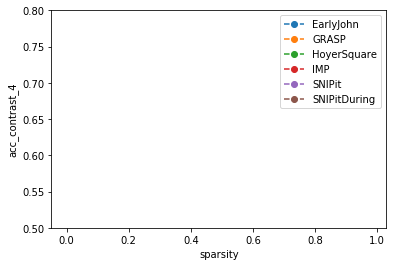

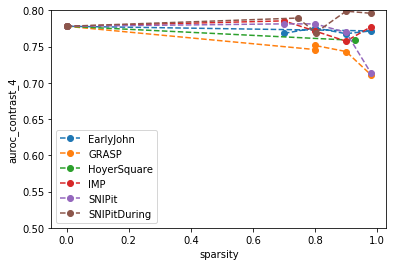

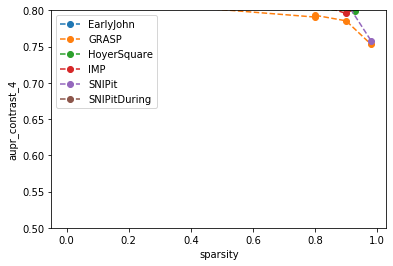

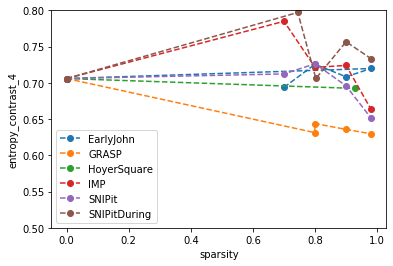

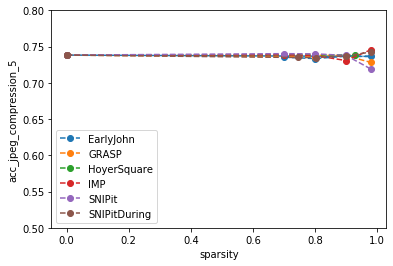

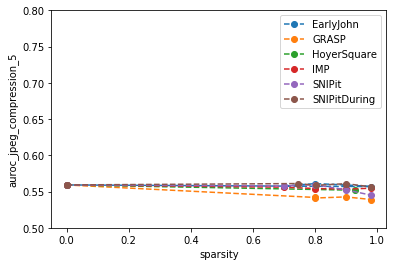

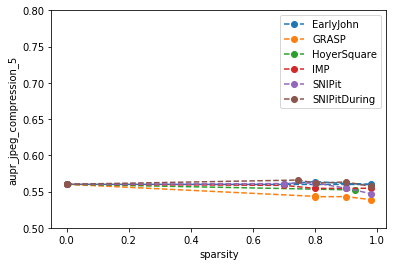

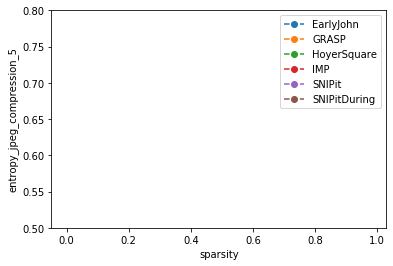

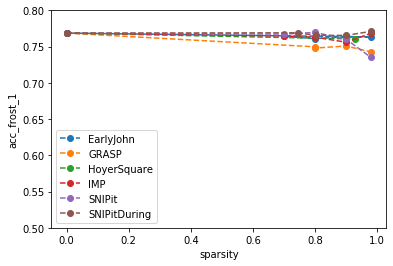

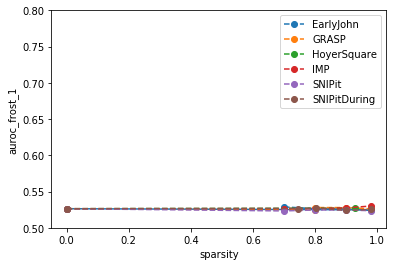

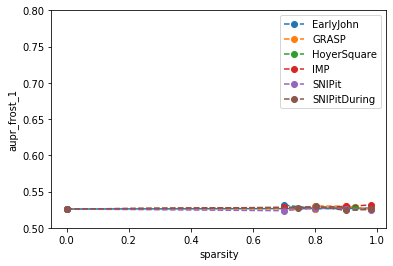

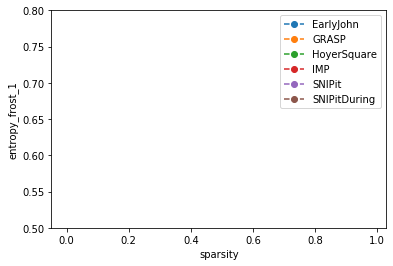

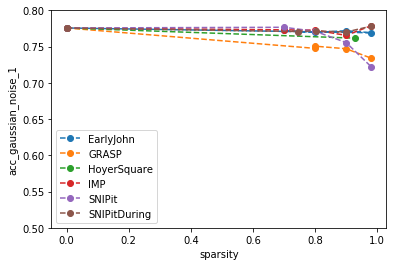

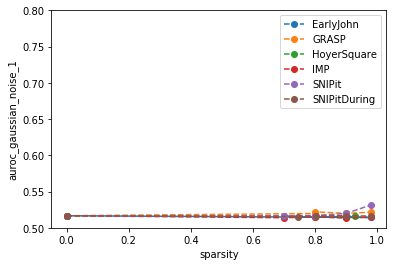

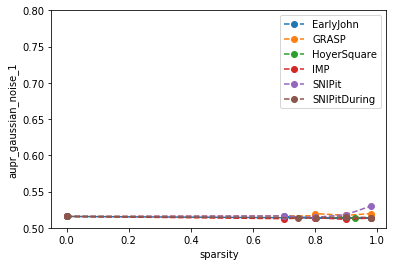

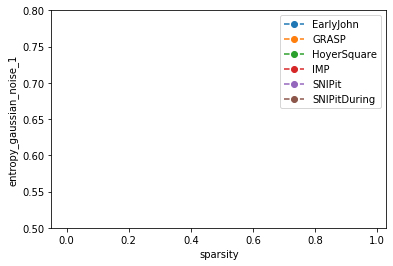

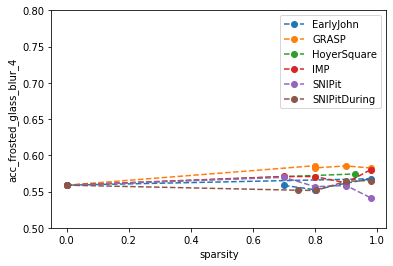

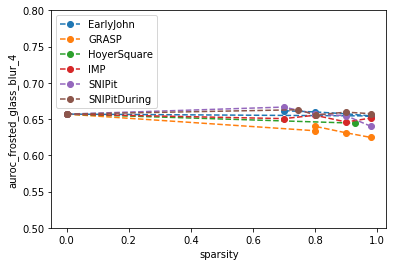

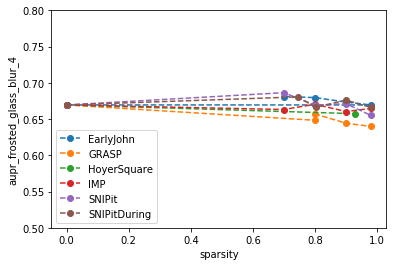

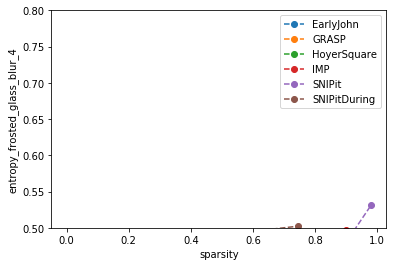

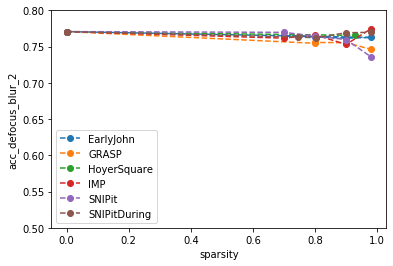

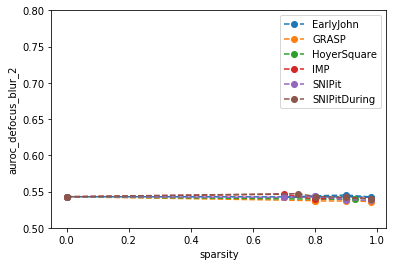

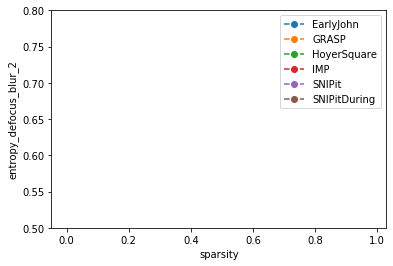

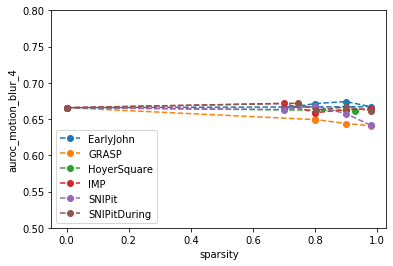

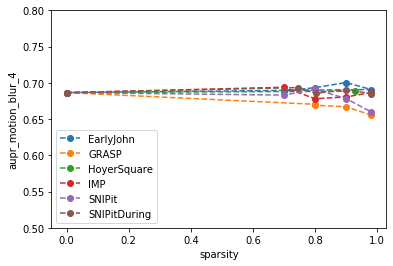

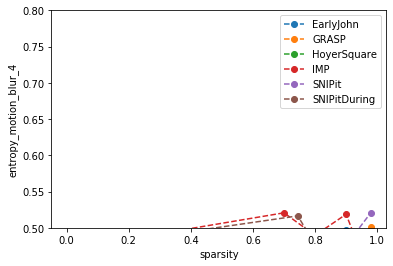

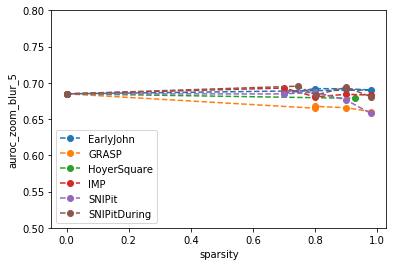

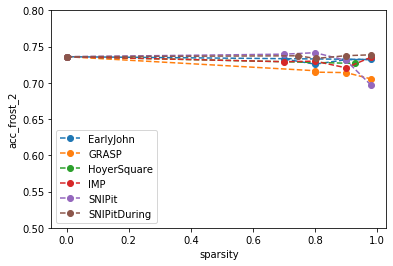

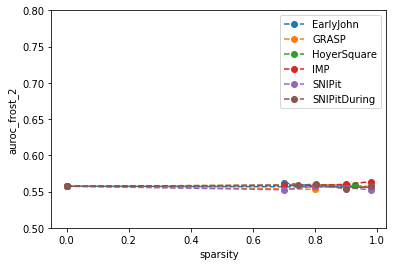

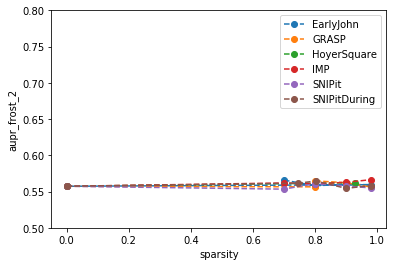

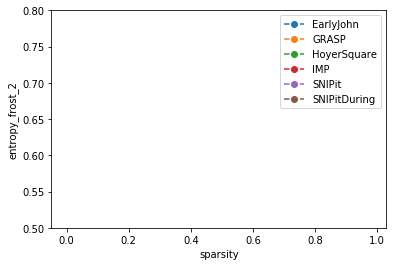

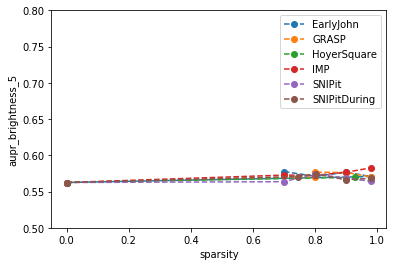

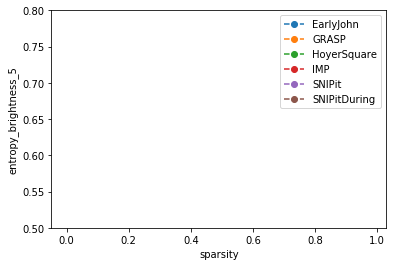

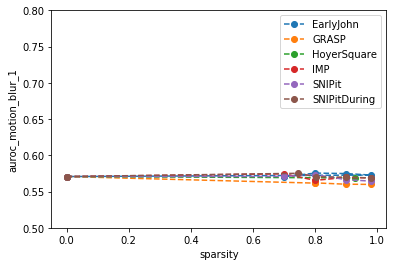

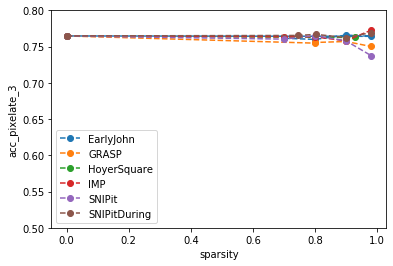

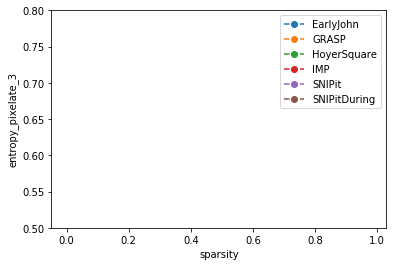

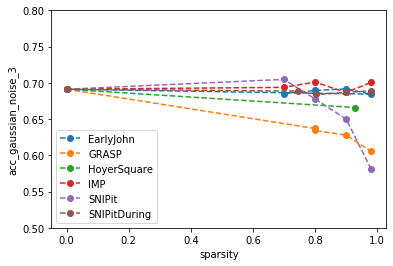

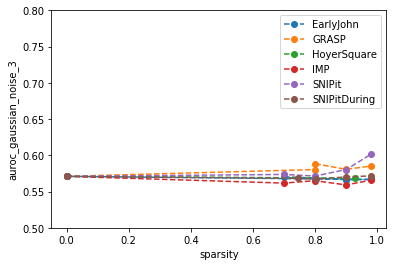

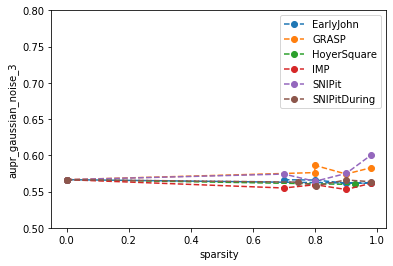

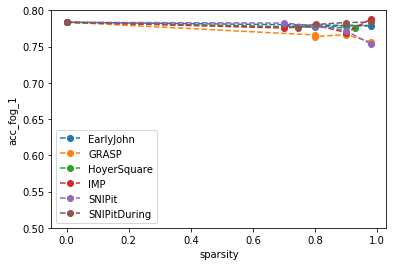

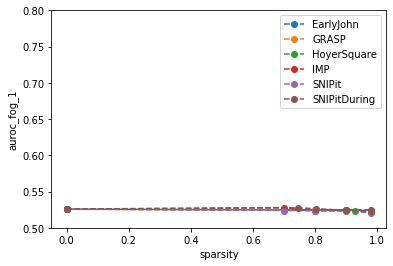

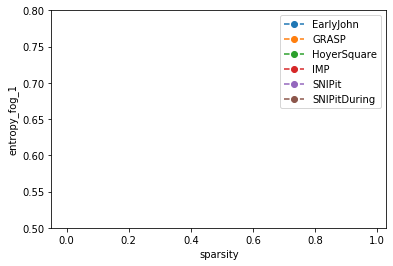

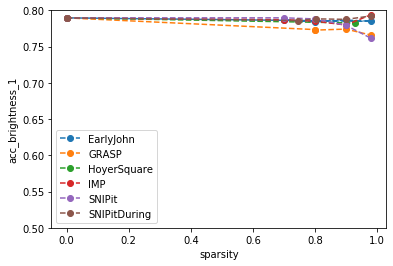

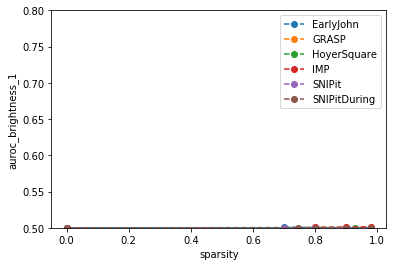

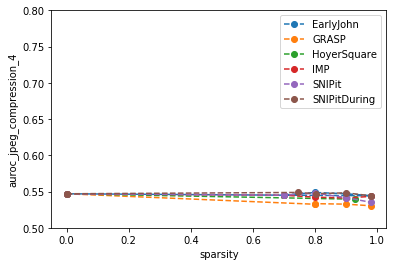

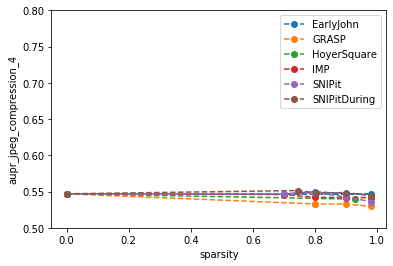

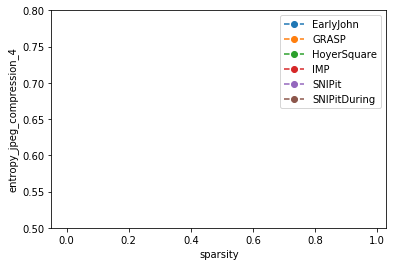

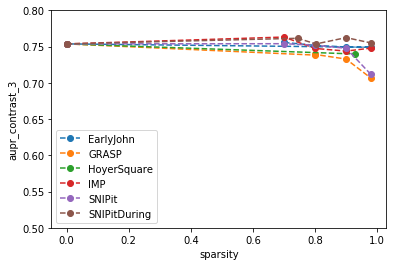

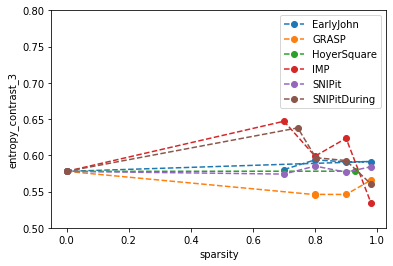

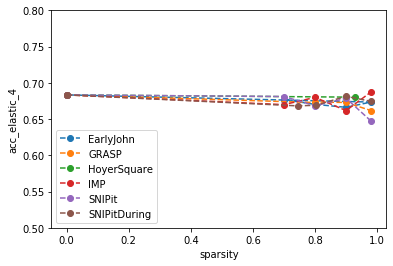

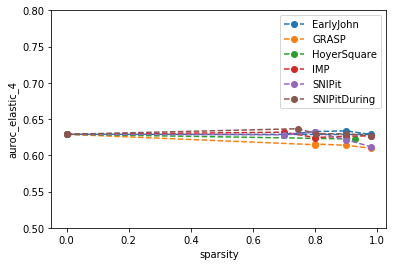

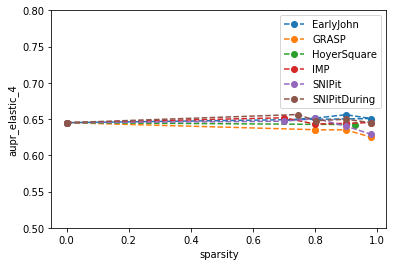

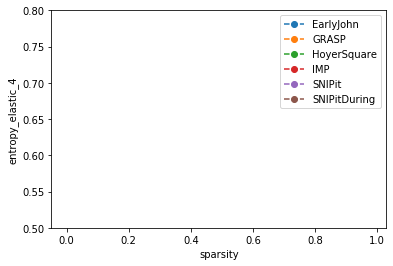

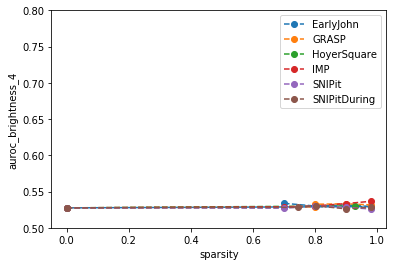

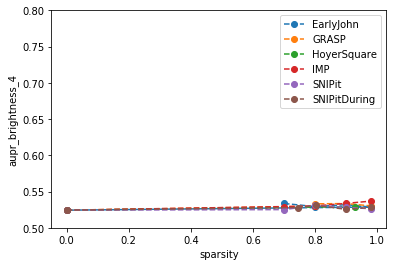

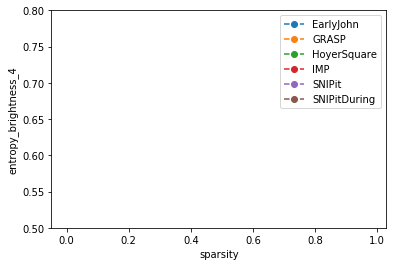

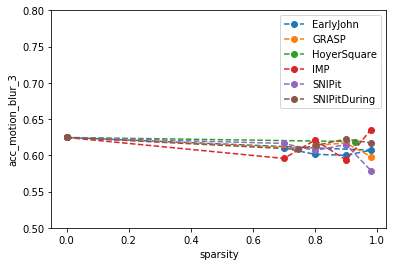

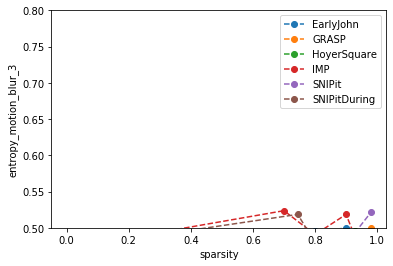

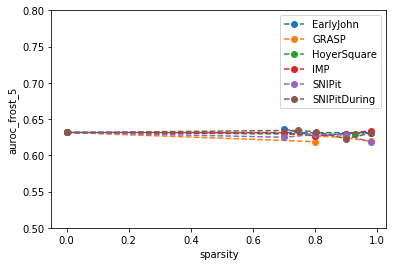

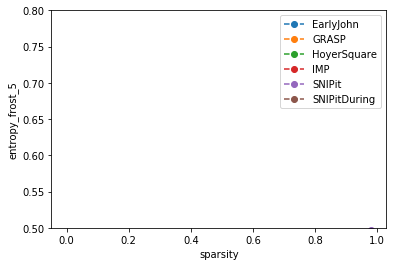

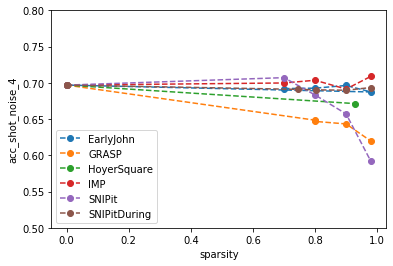

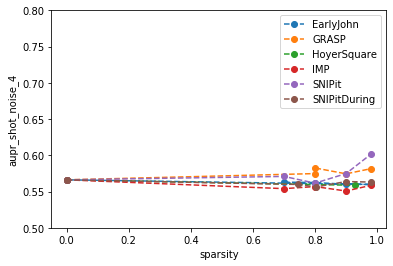

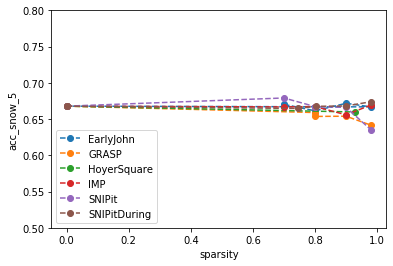

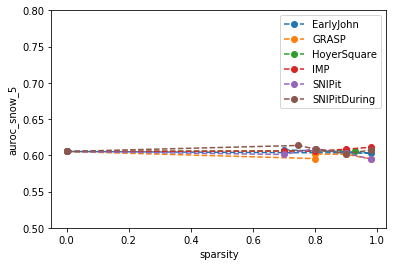

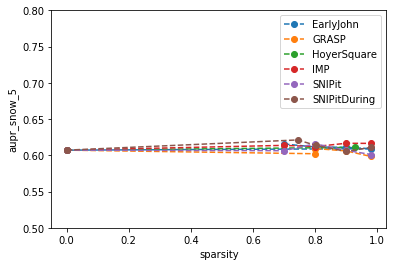

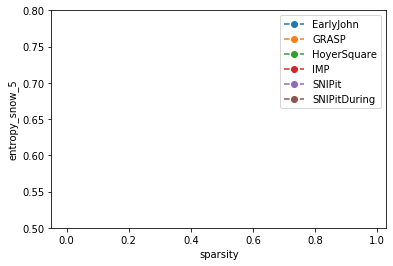

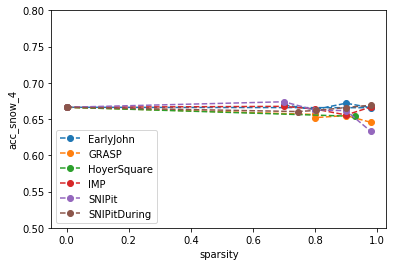

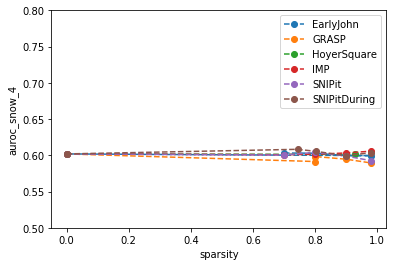

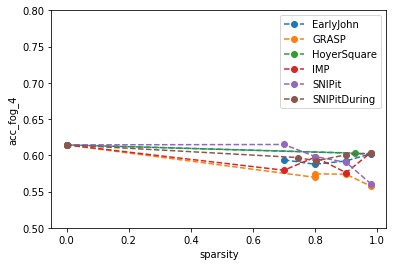

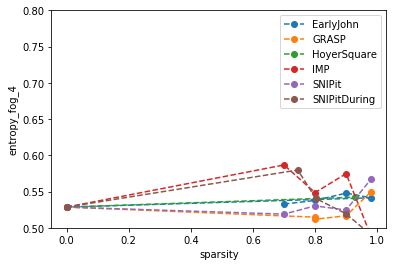

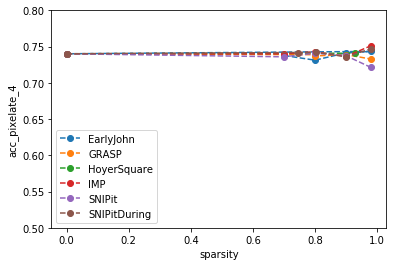

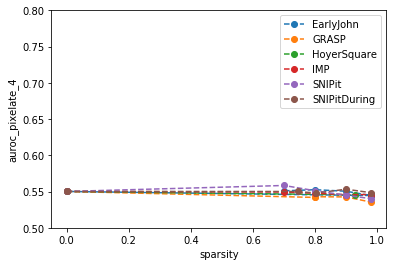

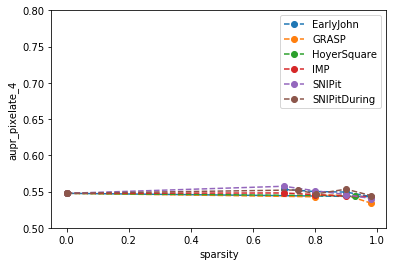

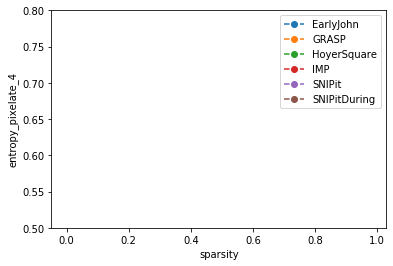

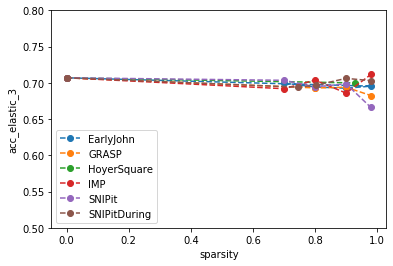

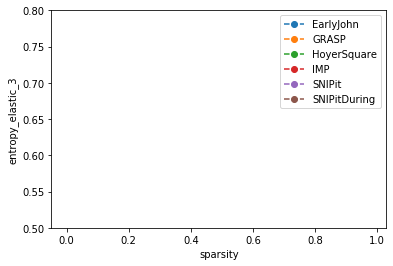

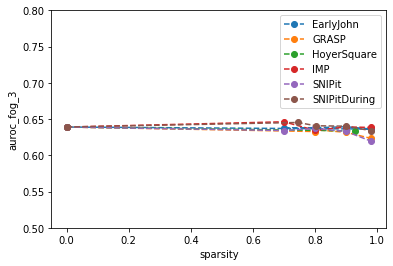

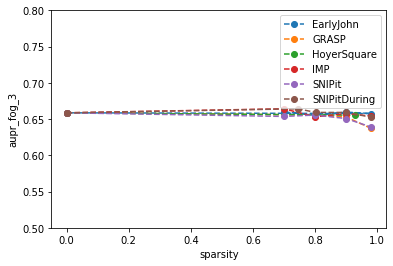

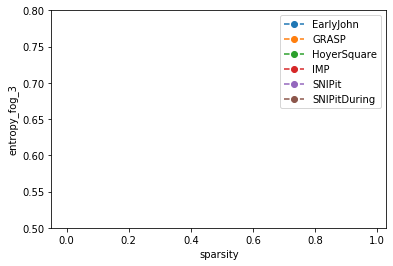

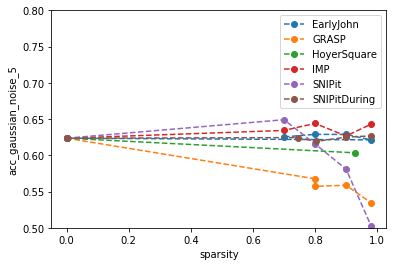

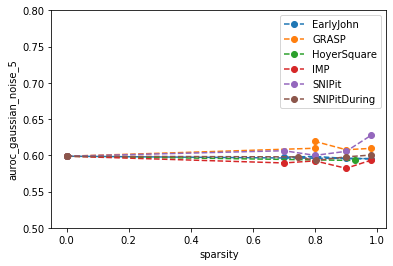

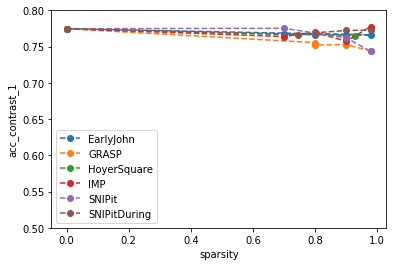

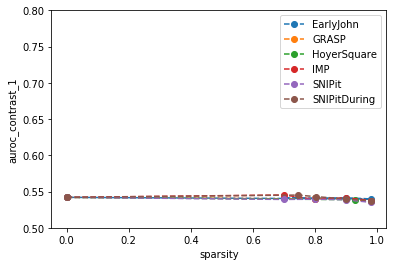

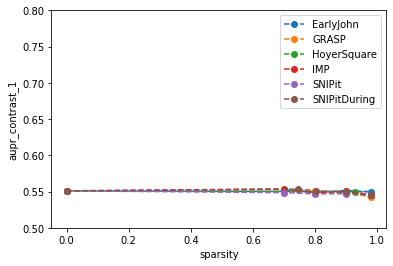

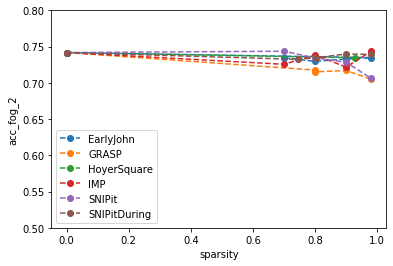

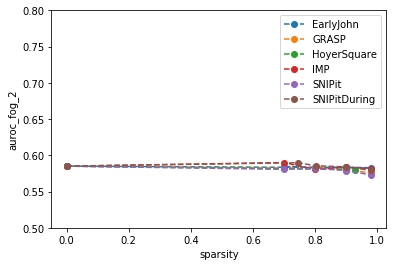

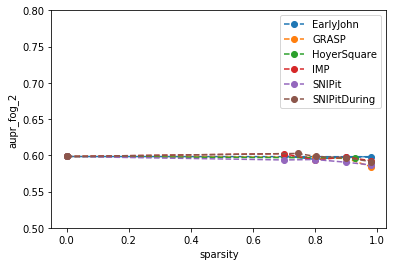

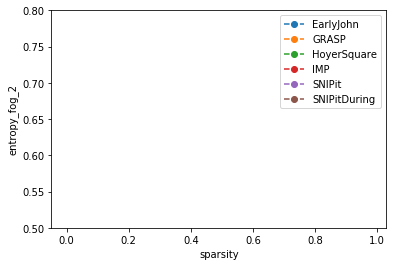

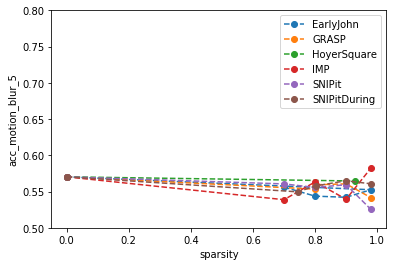

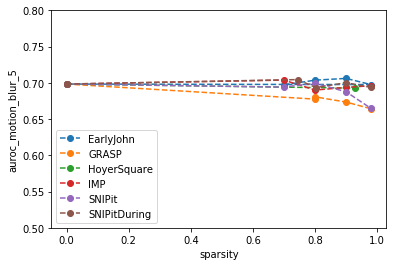

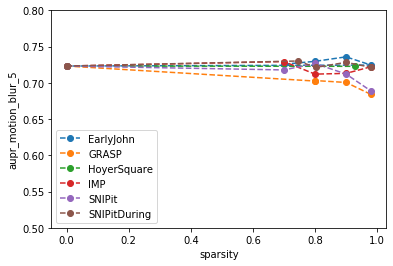

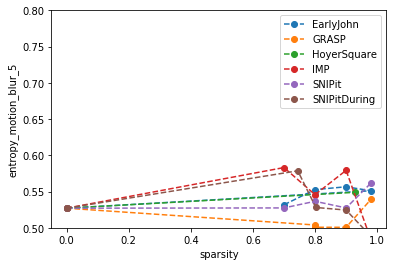

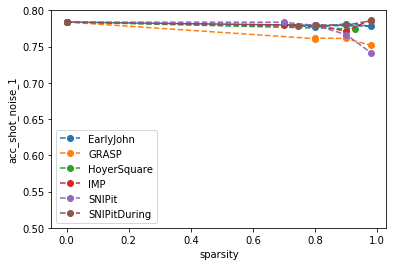

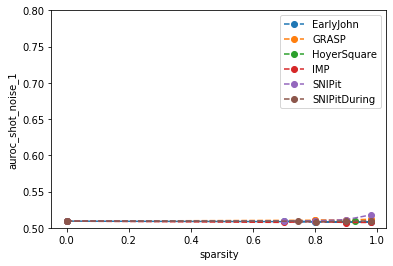

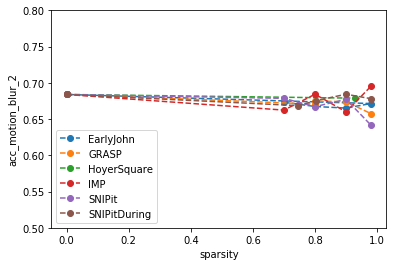

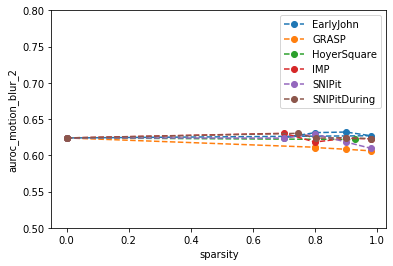

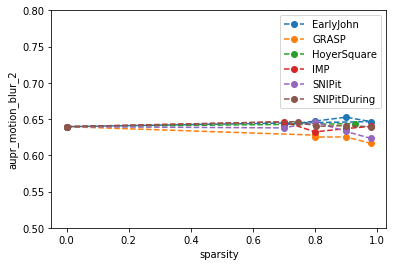

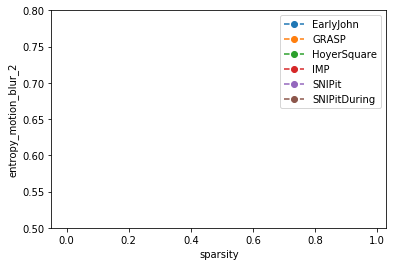

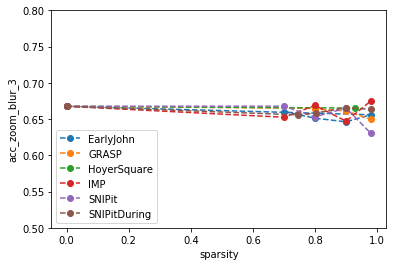

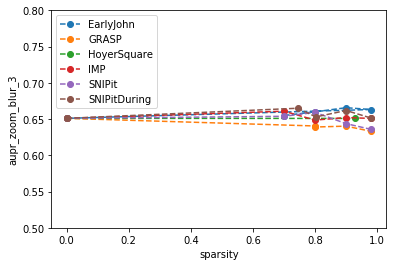

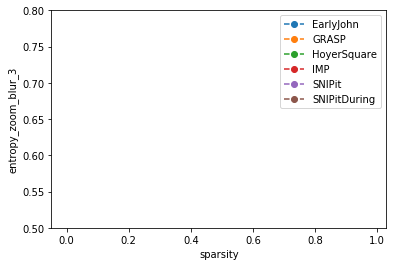

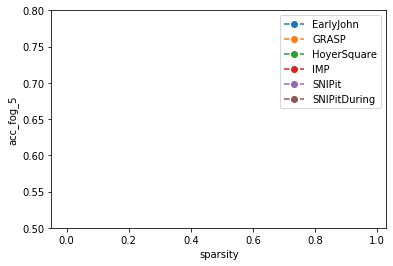

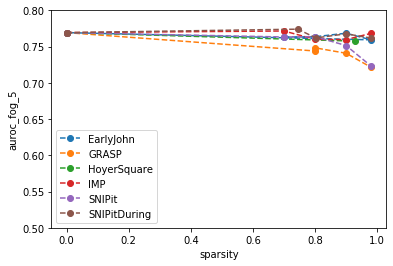

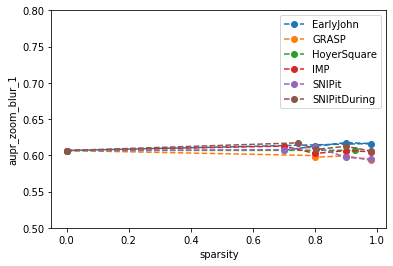

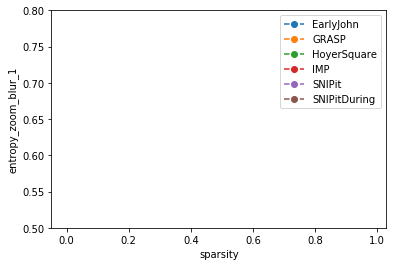

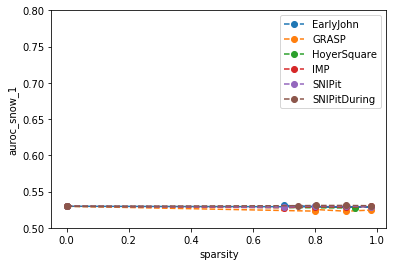

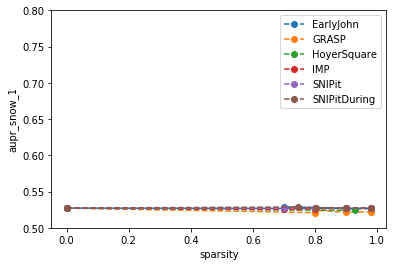

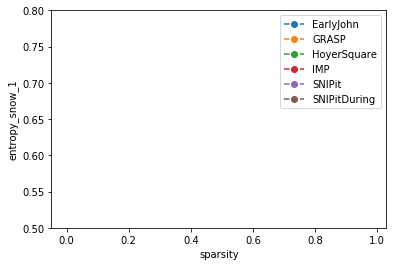

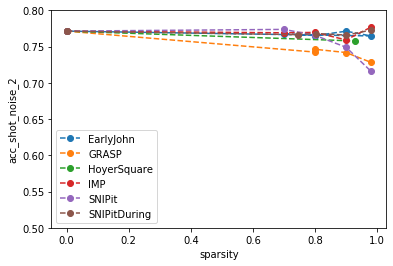

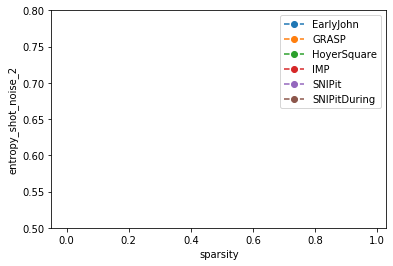

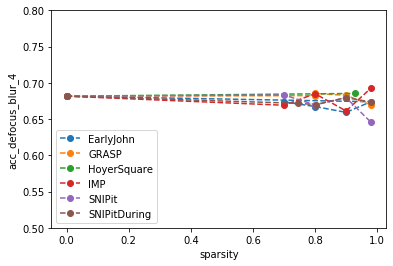

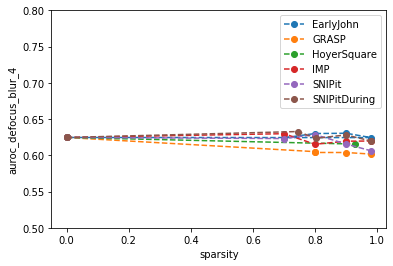

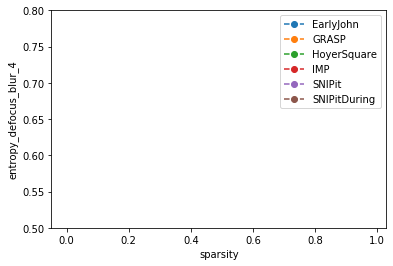

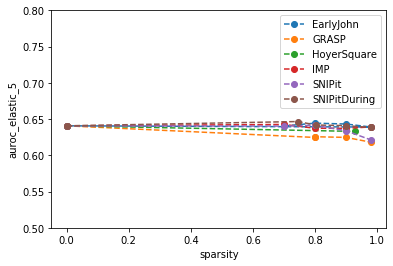

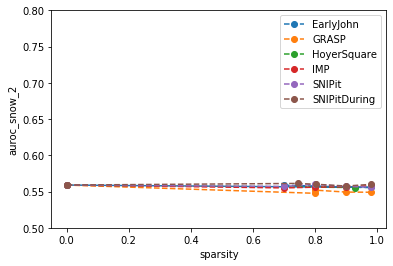

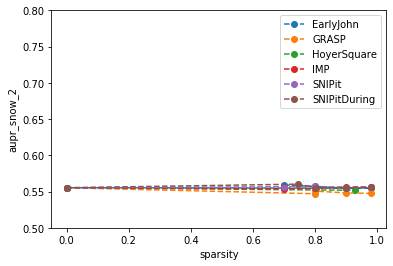

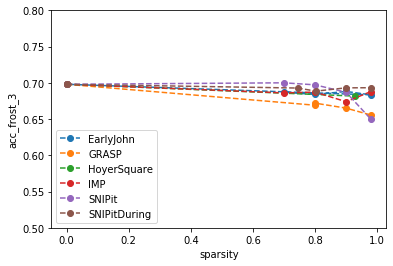

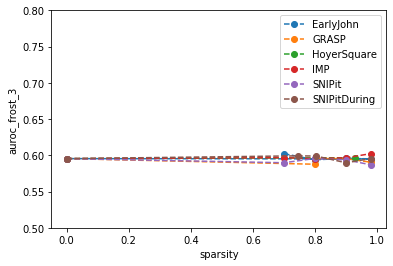

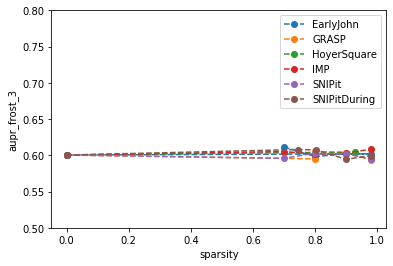

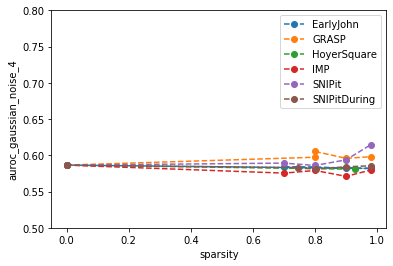

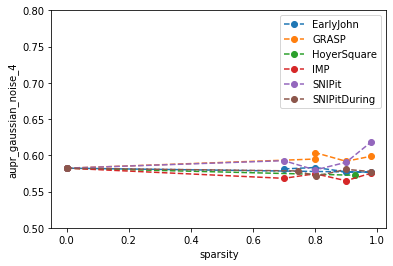

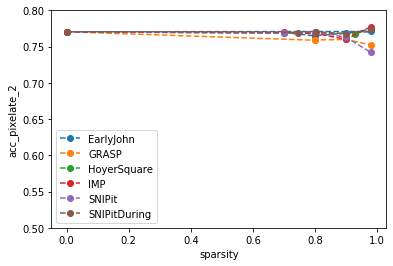

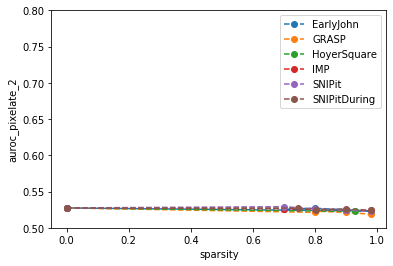

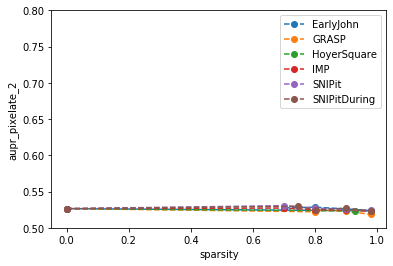

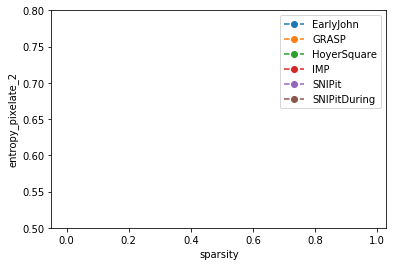

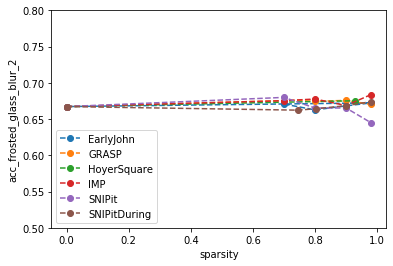

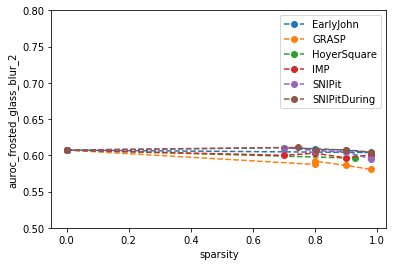

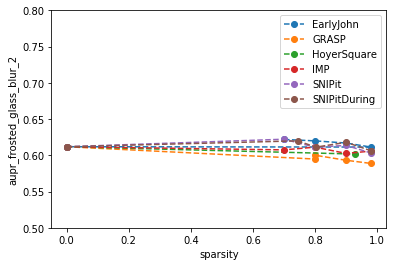

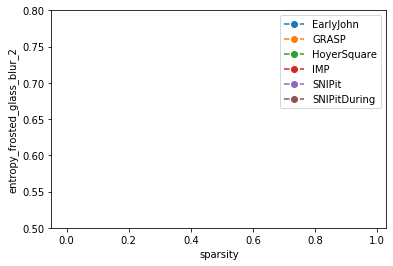

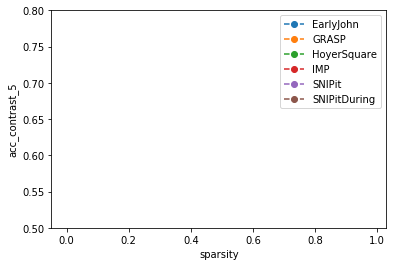

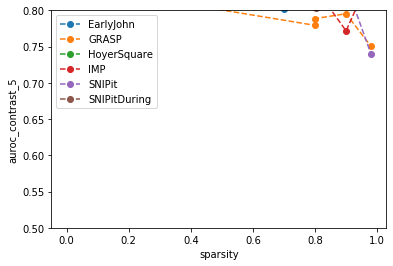

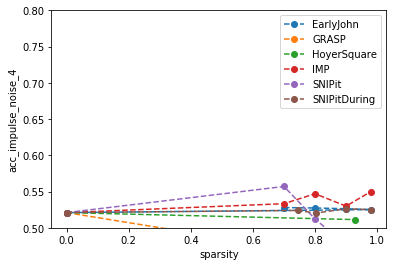

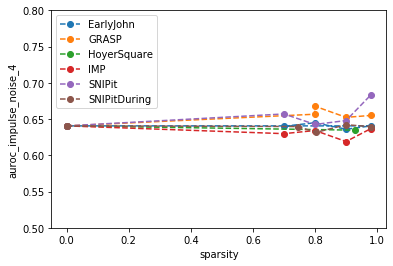

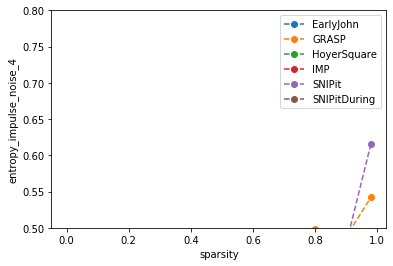

In [16]:
for col in results.columns:
    if col.startswith("result"):
        for crit in criterions:
            subset = results[(results["config.arguments.train_scheme"] == "DefaultTrainer") &
                       ((results["config.arguments.prune_criterion"] == crit) |
                       (results["config.arguments.prune_criterion"] == "EmptyCrit"))]
            plt.plot(subset["result.sparsity"], subset[col], linestyle='--', marker='o', label=crit)
        plt.xlabel("sparsity")
        plt.ylabel(col.split('.')[-1])
        plt.ylim(0.5, 0.8)
        plt.legend()
        plt.show()